## Make these plots more deployable for a presentation

In [1]:
import os
notebook_wd = os.getcwd()

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

os.chdir(os.path.join(notebook_wd, '..'))
from src.d00_utils.conf_utils import *

In [3]:
compounds, water = load_compounds()
exp_droplet_nh3g = load_experiments(['bd_nh3g'])
constants = load_constants()
paths = load_paths()
paths

{'raw_data': '190924-butenedial-nh3g-droplets.csv',
 'cleaned_data': '190930-butenedial-nh3g-droplets-CLEANED.csv',
 'processed_data': '190930-butenedial-nh3g-droplets-PROCESSED.csv',
 'clustered_data': '191001-butenedial-nh3g-droplets-CLUSTERED.csv',
 'results_directory': 'butenedial_evaporation'}

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
# created a new plotting function
from src.d00_utils.data_utils import import_ms_data
from src.d05_reporting.plot_ms_data import plot_ms_data_with_clusters, plot_ms_data

In [9]:
df_processed = import_ms_data(paths['processed_data'])
df_processed.columns

Index(['mins', 'solution', 'nominal_nh3_mM', 'mz84_mz283', 'mz85_mz283',
       'mz149_mz283', 'experiment'],
      dtype='object')

In [7]:
df_clustered = import_ms_data(paths['clustered_data'])
df_clustered.columns

Index(['mz84_mz283', 'mz85_mz283', 'mz149_mz283', 'mins', 'mz84_mz283_std',
       'mz85_mz283_std', 'mz149_mz283_std', 'mins_std', 'experiment'],
      dtype='object')

C:\Users\joh3146\Documents\droplet-chemistry\src\d00_utils\..\..\results\figs_out\191002-rel-ms-bd_nh3g_29-Pyrrolinone-Diazepine.png


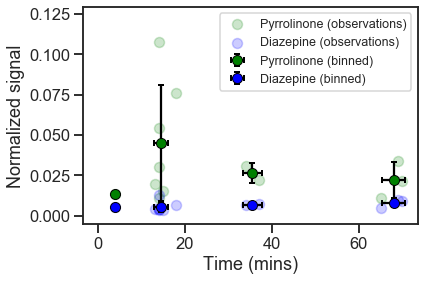

In [10]:
plot_ms_data_with_clusters(df_processed[df_processed.experiment=='bd_nh3g_29'], 
                           df_clustered[df_clustered.experiment=='bd_nh3g_29'],
                           t_col_name='mins', y_col_names=['mz84_mz283','mz149_mz283'],
                           analytes=['Pyrrolinone','Diazepine'],
                           point_colors=['green','blue'], make_twinx=False, t_error_col_name='mins_std',
                           y_error_col_names=['mz84_mz283_std','mz149_mz283_std'], experiment_name='bd_nh3g_29');
plt.legend(fontsize='x-small');

realizing this in-between data isn't exactly helpful because it's just a diagnostic to see if there's potential interference.

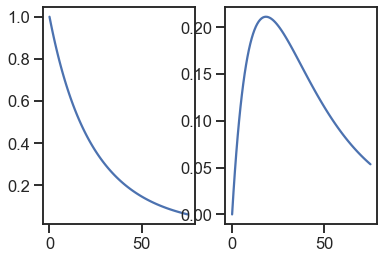

In [120]:
## Toy model to view PYR concentrations under varying NH3g conditions
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint

kevap_pyr = 1/170
kevap_bd = 1/85
krxn = 1/1500
krxn2 = 1/35

fig, ax = plt.subplots(1, 2)
def toymod(y, t): 
    bd, pyr = y
    dydt = [-krxn*bd*nh3g - kevap_bd*bd*bd, krxn*bd*bd*nh3g - kevap_pyr*pyr - krxn2*pyr]

    return dydt
    
ts = np.linspace(0, 75, 100)
results = odeint(
    toymod, 
    y0=[1, 0], t=ts)

ax[0].plot(ts, results[:, 0])
ax[1].plot(ts, results[:, 1])